# Info 2950 Final Project: A Data Driven Understanding of Marriage
### Phase 2 (10/24/22)
### by: Evan Schnell

### I submitted a version around midnight of the 24th, and am submitting a fourth version with more explanation of my code. I did my best to summarize my approach and would be happy to explain my code if needed. Please reach out to me with any questions or concerns at (518) 491-5242 or es796@cornell.edu

#### Single Idea: How has the perception of marriage evolved over time?
#### I contain more sections than are neccesary, but all required sections are included
#### I cannot run my datamining code that generates the categorical scores within this module as this is a time intensive process that could take over 24 hours. I was given permission to not run this from a graduate TA.
 
### Research Questions

Goal: My goal is to understand the evolving perception of marriage over time. 

As my data is incomplete due to financial constraints, I perform this analysis to determine whether or not an analysis of similar theme could be used to drive a properly funded study as the same algorithms could be used. Here is an outline of the analyses that I plan to perform in the final draft of my assignment

Q1) Are the categories provided in the lexicon (anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, and trust) generally independent or do they interact with each other? Understanding the answer to this question will help with normalizing my data and it will allow for better analysis in future steps.

Q2) How has the perception of marriage changed over time?

Q3) What is the effect of the author’s gender on his or her perception of marriage?
 
### Plan for Answering the Research Questions (future phases)

##### Question 1
- I will determine how the categories (anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, and trust) are related to each other by identifying the principal components of the data using Principal Component Analysis (PCA), a common unsupervised dimensionality reduction algorithm. I may perform this analysis separately on the data gathered from books written by males and females.
- Principal components are indices that are linear combinations of the original data categories. Understanding how the principal components are created for my data set will help me identify how variables are correlated within a higher dimensional data set. I hope to compare the results I obtain from my principal axes with results from a covariance matrix as a sanity check.
- Dimensional reduction techniques allow the user to account for more variables at the cost of losing some of the variance enclosed within the data. I hope to leverage PCA, a quantitative dimensional reduction technique, to determine what portion of the variance can be attributed to various principal axes and identify an optimal tradeoff between retained variance and the power of my tests.
- Understanding how the variables interact may help me normalize my data. I think comparing data normalized using the results of my PCA versus data normalized using the sum of all word counters could be interesting
 
##### Question 2
- I plan to run regressions on each of the emotional scores versus time. Based on the results of the principal axes I identify using PCA, the regressions I run in this step will likely change. 
- I plan to run data from male and female authors separately.
- How I attempt to answer this question will depend on the results I get from part 1.
- I will add more to this section once I know more.

##### Question 3
- How I attempt to answer this question will depend on the results I get from parts 1 and 2. 
- As of right now, I plan to run regressions in a similar manner to how we did on homework 4.
- I will add more to this section once I know more.

### My Exploratory Data Analysis
I plan on performing the analysis written above. We have not leared dimensionality reduction, so I will perform a better analysis once I have time to figure this out. For now, I will perform my exploratory data analysis by normalizing using the sum of category scores.

The explanations for my exploratory data analysis are provided with the code below.

### Data Format:

Each row of the enclosed dataframe consists of:
- A link to a book from Project Gutenberg on marriage encoded as a UTF-8 text file
- The title of the book
- The author's name
- An estimated year of publication (or the midpoint of the author's life)
- The author's gender
- Word counters for the categories: 
    - 1) anger
    - 2) anticipation
    - 3) disgust
    - 4) fear
    - 5) joy
    - 6) negative
    - 7) positive
    - 8) sadness
    - 9) surprise
    - 10) trust
- The sum of all the word counters

### Data Source
I obtained all of my data (on 178 books) from project Gutenberg: 

To see the books I chose from, go to advanced search and select: 
- Subject: marriage
- Language: English
- Filetype: Plain Text

After clicking on a book, you get the option to open the text as a variety of filetypes. I chose UTF-8 text files.

I excluded all duplicates and only considered the first book in a series, or the whole series as one text file, if possible, to keep one series from having too much of an effect on my data set. This reduced the number of viable books from 265 books to 178 books.

https://www.gutenberg.org/ebooks/results/?author=&title=&subject=marriage&lang=en&category=&locc=&filetype=txt&submit_search=Search&pageno=1
 
### Lexicon Source
The NRC Emotion Lexicon is self described as a "list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive)." This list can be used for free for educational and research purposes.

Here is the link to the website: https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm


I chose this list because it is extremly comprehensive and contains scores for over 14,000 words. It is also a reputable source that has been used in several academic papers.

I downloaded the lexicon as a CSV and modified it to obtain a reformatted lexicon that reduces my runtime. The process of reformatting the lexicon is described below.


### How I Reformatted the Lexicon
The CSV file contained over 140,000 rows containing:
- the word of interest
- the category
- a 0 or 1

The first word was the same in the first 10 rows so I reformatted the lexicon to store:
- the word of interest
- 10 numbers (a 0 or 1) for each category

I did not add a reformatted row if all 10 numbers were 0's

### How I Cleaned the Text Data

I generated each row in my dataframe by adding 1 to each category attribute when a word with that category attribute appeared in the text.
- I removed undesirable special characters and exploded the text into words
- I removed unneccesary whitespace and removed common words without significant meaning to increase runtime
- I compare the remaining words in the array with the reformatted lexicon and added the scores in the 10 categories of the lexicon to the overall score if a word in the lexicon appears in the list
- I realized that counting the number of occurrances per word, and then comparing with the lexicon would decrease the runtime, but I noticed this too late to make the optimization
- A friend who took data mining said this process I developed would be similar to vectorization if I implement the optimization, that I did not add (mentioned in the bullet above)

### Limitations
This study is extremely limited because:
- It is based on a collection of 178 books that I picked because they were free to access. This means that the books may not be representative of the time period they were published in because I used the avaliable data to generate more volume instead of just picking the most representative books (If I had money to spend on this project, I would pick 20 representative books for each decade and use these as my data set)
- There are periods of time that lack many data points while a lot of the dates of authorship seem to be from between 1800 - 1925. There is much less data from 1500-1799, meaning that there are significant gaps in my data.
- The selected books were pick to be restored by volunteers in the 2010-2020's. This means that books that appeal to our current values may be selected for (the volunteers pick the books they like)
- It relies on the accuracy of a lexicon that only scores words as having 0's or 1's per each category
- It does not consider sarcasm, context, or the tendency for the meaning of words to change over time

These limiations mean that we should not take the results of this study too seriously as the data has significant gaps and I did not have sufficient access to books to create a representative data set from which I could perform this study. Instead, this study should be seen as a precursor study that can be used to identify potential trends that could be investigated more thoroughly by a more extensive, better funded study. Nevertheless, the algorithms for collecting the data set and the analysis I plan to use could be used on a better data set to result in significant discoveries.

Taking the results of this study too seriously and basing your decisions on whether or not to get married can result in a reduced quality of life. It is better to make these decisions for yourself while asking family members and professionals for advice. This analysis is meant to be purely academic and with the quality of the initial data set, it should not be taken too seriously.

### Data Description (of the final dataset)
###### I answer all the questions from sections 3.1 - 3.5 in Datasheets for Datasets (Gebru et al).
###### To ensure that I do not miss anything and to make grading easier, I answer all questions in order, even if I have previously stated the information

#### Motivation (3.1)
I created the dataset to accomplish my goal and answer the research questions listed above. There were not datasets that attempted to quantify the emotions of books on marriage in the past, so I had to text mine books in order to create one. I do not have time time to learn about each individual book and its importance, so I used project Gutenberg because it is supposed to contain books that were important enough to preserve from a diverse set of time periods.

I created the dataset for my own use. There was no funding involved. My only motivation was answering my research questions and having the opportunity to teach myself how to text mine & improve my coding skills.

#### Composition (3.2)
The instances that comprise the data set are books on marriage from project Gutenberg. Each row of the enclosed dataframe consists of:
- A link to a book from Project Gutenberg on marriage encoded as a UTF-8 text file
- The title of the book
- The author's name
- An estimated year of publication (or the midpoint of the author's life)
- The author's gender
- Word counters for the categories: 
    - 1) anger
    - 2) anticipation
    - 3) disgust
    - 4) fear
    - 5) joy
    - 6) negative
    - 7) positive
    - 8) sadness
    - 9) surprise
    - 10) trust
- The sum of all the word counters

I obtained all of my data (on 178 out of 265 books using the desired search parameters) from project Gutenberg. I excluded all duplicates and only considered the first book in a series, or the whole series as one text file, if possible, to keep one series from having too much of an effect on my data set. This reduced the number of viable books from 265 books to 178 books, so my data is technically from a larger set.

The contents of each instance are clearly described within this section

Elements of the data can serve as labels for each instance. The useful ones include the title of the book, the author's gender, and an estimated year of publication.

There is no information missing from individual instances

The data within single instances is stored within a dataframe so that it is easy to know what goes together.

I have not determined the best data splits for training, validation, and testing. I want to review this topic a bit more by completing the new problem set before I develop the splits.

There are no redundant instances within the data set. Some of the scores may be partially redundant, but I plan to address this using Principal Component Analysis. The sources of noise / errors within this data can be attributed to my estimate for year of publication. If the year of publication was not on project Gutenberg, I tried to estimate it by taking the median year in the author's life.

None of the data is confidential as Project Gutenberg is open source and this project is not for financial gain.

The data should not cause anxiety, but some of the book titles are offensive as the books were written in times when women and minorities had fewer rights. These books must be inluded because removing books with insulting titles from the analysis will significantly affect the results of this analysis.

None of the other questions are applicable.

#### Collection process (3.3)
The process used for collecting the data associated with each instance is described above. Please see the sections Data Source, Lexicon Source, How I Reformatted the Lexicon, and How I Cleaned the Text Data for more thorough responces to the following questions.

The data associated with each instance was obtained by concatenating information I typed out (Professor Mimno told me to do this) and the results of my algoriths (the 10 feature scores plus the total score). This information was all extracted out the txt page from Project Gutenberg.

I made an algorithm to score the books as outlined above. This algorithm was not formally validated, but I tested it by running it on a text source and comparing it with the outputs from a vectorization based script my friend in data science made. I cannot include this information, but the code seems to work. 

The procedure for picking which books to consider is described above. Generally, I only use one book from a series and I choose the first one, or a compilation of volumes if it is included.

I collected all of the data by finding it on the Project Gutenberg Pages or using my algorithm to extract it. I was not paid for doing this. 

The data was collected within a shorte timeframe and I confirmed that the books considered did not change over this time period. As of 10/10/22, the page I used to get txt book links was current.

There were no ethical review processes conducted.

None of the other questions are applicable.

#### Preprocessing, Cleaning, and Labelling (3.4)

No instances of data were removed once they were generated. The data was labeled as described in 3.1, but this procedure was consistent throghout the entire process and planned in advance. 

I removed common words without meaning to reduce the runtime of my algorithm, but I made sure that none of these were in my lexicon to make sure that this had no effect upon my data.

I also cleaned my lexicon, but this process did not result in the loss of any data that could effect my results as I restructured the data to run faster and removed words with all 0's as they cannot affect the results.

None of the other questions are applicable.

#### Uses (3.5)

This data set has not been used for other purposes. I created it very recently.

The lexicon I adapt has been used as the basis of several papers. Here is a link to all the information on the origional lexicon: https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm

This dataset is very specifically designed to answer the main questions I ask. I cannot think of other uses for it at the present time.

The data set is viable for future uses as long as all parties using it recognize that it is current up to 10/10/22.

Please see the section on limitations to know what the data set should not be used for.

I have no other comments.

### File Descriptions (I will rename the files to make them more understandable later on)

##### Generating a cleaned lexicon
- NRC-Emotion-Lexicon-Wordlevel-v0.92: This is the origional lexicon I downloaded (csv)
- Cleaned Lexicon: I clean the lexicon in this script (ipynb)
- new_lexicon_no_zeros: this is the cleaned lexicon I generate (txt)

##### Numeric scores
- DataGen: I generate the quantitative 10 category scores in this script (ipynb)
- 2950 Data: This is the final text document 

##### Generating the dataframe I use
- Final Dataframe: I generate the final dataframe that I will use in my analysis (ipynb)

### Questions for Reviewers
Do you have any suggestions for how I can better investigate questions 2 and 3?
Are there any cool ML techniques that suit my data, but are outside the scope of the course?
Do you have any suggestions for improvement I have not requested in the previous 2 questions?

##### I was told by members of course staff that I do not need to run my inputs and outputs as long as I include the code and show the outputs of each step. This is relevant to me because I generate my data set using text mining and my code takes a long time to run, so using a saved output is more effective


In [39]:
import pandas as pd
import numpy as np
import requests
import urllib
import re
import seaborn as sns

##### Cleaning the lexicon - I choose to not run this script so it does not create copies of files

##### source: NRC Word-Emotion Association Lexicon (NRC Emotion Lexicon) Version 0.92 10 July 2011 Copyright (C) 2011 National Research Council Canada (NRC) 

##### Contact: Saif Mohammad (saif.mohammad@nrc-cnrc.gc.ca)

# I reformat the nrc lexicon so that it is more usable 
Each word (14000+) used to be stored as a 10 rows that each included the word, one of the 10 emotional features, plus a score. I reformatted this into a file where one row represents one word and each row includes the word and 11 numbers representing the emotional features plus the total sum. I also drop the words with no significant values

In [ ]:
import pandas as pd
import numpy as np
import requests
import urllib
import re

lex = open("NRC-Emotion-Lexicon-Wordlevel-v0.92.csv", "r")
lexicon = str(lex.read())
lex_split = lexicon.split()

slim_lex = []
lex_len = len(lex_split)
#slim_counter = 0
counter = 0

while counter<lex_len:
    if (counter%3==2 or counter%30==0):
        slim_lex.append(lex_split[counter])
        #slim_counter = slim_counter + 1
    counter = counter + 1

#reformat = np.reshape(slim_lex,(14154,11))
#np.savetxt("new_lexicon.txt", reformat, fmt="%s")

#re-run the code to cut out unimportant nodes
slim_lex_len = len(slim_lex)
counter2 = 0
superslim_lex = []
while counter2 < (slim_lex_len):
    if (slim_lex[counter2 + 1]!="0" or slim_lex[counter2 + 2]!="0" or slim_lex[counter2 + 3]!="0" or slim_lex[counter2 + 4]!="0" or slim_lex[counter2 + 5]!="0"
        or slim_lex[counter2 + 6]!="0" or slim_lex[counter2 + 7]!="0" or slim_lex[counter2 + 8]!="0" or slim_lex[counter2 + 9]!="0" or slim_lex[counter2 + 10]!="0"):
        superslim_lex.append(slim_lex[counter2 + 0])
        superslim_lex.append(slim_lex[counter2 + 1])
        superslim_lex.append(slim_lex[counter2 + 2])
        superslim_lex.append(slim_lex[counter2 + 3])
        superslim_lex.append(slim_lex[counter2 + 4])
        superslim_lex.append(slim_lex[counter2 + 5])
        superslim_lex.append(slim_lex[counter2 + 6])
        superslim_lex.append(slim_lex[counter2 + 7])
        superslim_lex.append(slim_lex[counter2 + 8])
        superslim_lex.append(slim_lex[counter2 + 9])
        superslim_lex.append(slim_lex[counter2 + 10])
    counter2 = counter2 + 11

reformat2 = np.reshape(superslim_lex,(6453,11))
np.savetxt("new_lexicon_no_zeros.txt", reformat2, fmt="%s")

### Here is the cleaned lexicon

In [4]:
output = pd.read_csv("new_lexicon_no_zeros.txt", sep=' ', header = None)
print(output)

               0   1   2   3   4   5   6   7   8   9   10
0          abacus   0   0   0   0   0   0   0   0   0   1
1         abandon   0   0   0   1   0   1   0   1   0   0
2       abandoned   1   0   0   1   0   1   0   1   0   0
3     abandonment   1   0   0   1   0   1   0   1   1   0
4            abba   0   0   0   0   0   0   1   0   0   0
...           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
6448         zany   0   0   0   0   0   0   0   0   1   0
6449         zeal   0   1   0   0   1   0   1   0   1   1
6450      zealous   0   0   0   0   1   0   1   0   0   1
6451         zest   0   1   0   0   1   0   1   0   0   1
6452          zip   0   0   0   0   0   1   0   0   0   0

[6453 rows x 11 columns]


### Here is the code for the data mining and 10 category score generation

I do not run this section as it takes over 24 hours to run and I have the output saved

The web scraping and data cleaning go hand in hand for my project. For this reason, I include the script that does both.

**Procedure**

I download the lexicon and create a list containing the link to the txt file, the book title, author, estimated year of publication, and author's gender.

For each book, I use urllib to open the text file the book relates to. Then I remove all special characters and characters that are not in the alphabet or spaces. I split on spaces to isolate words, remove common words, and then score the remaining words against the lexicon.

In [ ]:
import pandas as pd
import numpy as np
import requests
import urllib
import re

#clean the NRC emotional lexicon
lexicon_no_zeros = np.genfromtxt('new_lexicon_no_zeros.txt', delimiter=' ', dtype=None,encoding = 'UTF-8')

#make an array of tuples (link + title + author + year + gender) and include all books (178 total)
input_vector = [('https://www.gutenberg.org/cache/epub/28561/pg28561.txt', 'Josephine Makers of History', 'Abbot Jacob', 1841, 'm'),
                ('https://www.gutenberg.org/files/4667/4667-0.txt', 'Seven Wives and Seven Prisons', 'L.A. Abbott', 1870, 'm'),
                ('https://www.gutenberg.org/cache/epub/67472/pg67472.txt', 'How to Pick a Mate The Guide to a Happy Marriage', 'Clifford Rose Adams and Vance O. Packard', 1946, 'm'),
                ('https://www.gutenberg.org/files/59333/59333-0.txt', 'Harolds Bride: A Tale', 'Charlotte Maria Tucker', 1902, 'f'),
                ('https://www.gutenberg.org/cache/epub/61804/pg61804.txt', 'Sheer Off: A Tale', 'Charlotte Maria Tucker', 1870, 'f'),
                ('https://www.gutenberg.org/files/26368/26368-0.txt', 'The Ladies Book of Useful Information', 'Unknown Woman', 1897, 'f'),
                ('https://www.gutenberg.org/cache/epub/39478/pg39478.txt', 'The Levelers', 'Unknown Woman', 1896, 'f'),
                ('https://www.gutenberg.org/cache/epub/40623/pg40623.txt', 'Private Sex Advice to Women', 'R. B. Armitage', 1917, 'f'),
                ('https://www.gutenberg.org/cache/epub/4620/pg4620.txt', 'The Wedding Guest', 'T. S. Arthur', 1856, 'm'),
                ('https://www.gutenberg.org/cache/epub/4630/pg4630.txt', 'The Home Mission', 'T. S. Arthur', 1853, 'm'),
                ('https://www.gutenberg.org/cache/epub/4628/pg4628.txt', 'The Iron Rule or, Tyranny in the Household', 'T. S. Arthur', 1853, 'm'),
                ('https://www.gutenberg.org/cache/epub/4631/pg4631.txt', 'The Hand But Not the Heart or, The Life-Trials of Jessie Loring', 'T. S. Arthur', 1858, 'm'),
                ('https://www.gutenberg.org/cache/epub/4629/pg4629.txt', 'Home Scenes, and Home Influence: A Series of Tales and Sketches', 'T. S. Arthur', 1854, 'm'),
                ('https://www.gutenberg.org/files/62705/62705-0.txt', 'The Book of Nature', 'James Ashton', 1861, 'm'),
                ('https://www.gutenberg.org/files/61143/61143-0.txt', 'Some Reflections Upon Marriage', 'Mary Astell', 1830, 'f'),
                ('https://www.gutenberg.org/cache/epub/121/pg121.txt', 'Northanger Abbey', 'Jane Austen', 1803, 'f'),
                ('https://www.gutenberg.org/cache/epub/42085/pg42085.txt', 'A Bachelor Husband', 'RUBY M. AYRES', 1920, 'f'),
                ('https://www.gutenberg.org/files/16146/16146-0.txt', 'Petty Troubles of Married Life, Complete', 'Honore de Balzac', 1825, 'm'),
                ('https://www.gutenberg.org/cache/epub/16206/pg16206.txt', 'ANALYTICAL STUDIES', 'Honore de Balzac', 1825, 'm'),
                ('https://www.gutenberg.org/files/16205/16205-0.txt', 'The Physiology of Marriage, Complete', 'Honore de Balzac', 1825, 'm'),
                ('https://www.gutenberg.org/cache/epub/37140/pg37140.txt', 'A Proposal Under Difficulties A Farce', 'John Kendrick Bangs', 1896, 'm'),
                ('https://www.gutenberg.org/cache/epub/40640/pg40640.txt', 'The Following of the Star', 'Florence L. Barclay', 1892, 'f'),
                ('https://www.gutenberg.org/cache/epub/47003/pg47003.txt', 'Dimbie and I--and Amelia', 'Mabel Barnes-Grundy', 1906, 'f'),
                ('https://www.gutenberg.org/cache/epub/32135/pg32135.txt', 'Maids Wives and Bachelors', 'Amelia Edith Huddleston Barr', 1898, 'f'),
                ('https://www.gutenberg.org/files/40483/40483-0.txt', 'THESE TWAIN', 'Arnold Bennett', 1915, 'm'),
                ('https://www.gutenberg.org/cache/epub/4510/pg4510.txt', 'Watersprings', 'Arthur Christopher Benson', 1913, 'm'),
                ('https://www.gutenberg.org/files/58884/58884-0.txt', 'The Osbornes', 'E. F. Benson', 1909, 'm'),
                ('https://www.gutenberg.org/cache/epub/44210/pg44210.txt', 'The Angel of Pain', 'E. F. Benson', 1906, 'm'),
                ('https://www.gutenberg.org/files/60168/60168-0.txt', 'Mrs. Ames', 'E. F. Benson', 1903, 'm'),
                ('https://www.gutenberg.org/cache/epub/40793/pg40793.txt', 'The Rubicon', 'E. F. Benson', 1894, 'm'),
                ('https://www.gutenberg.org/files/60241/60241-0.txt', 'Sheaves', 'E. F. Benson', 1907, 'm'),
                ('https://www.gutenberg.org/cache/epub/47000/pg47000.txt', 'Marriage, As It Was, As It Is, And As It Should Be', 'Annie Besant', 1882, 'f'),
                ('https://www.gutenberg.org/cache/epub/20830/pg20830.txt', 'The Good Housekeeping Marriage Book', 'William F. Bigelow', 1938, 'm'),
                ('https://www.gutenberg.org/files/3663/3663-0.txt', 'The Girl From Kellers', 'Harold Bindloss', 1906, 'm'),
                ('https://www.gutenberg.org/files/56538/56538-0.txt', 'The Naughty Man; or, Sir Thomas Brown - Love, Courtship and Marriage in High Life. A Poetical Satire', 'Frank Chapman Bliss', 1878, 'M'),
                ('https://www.gutenberg.org/files/31529/31529-0.txt', 'Modern marriage and how to bear it', 'Maud Churton Braby', 1904, 'f'),
                ('https://www.gutenberg.org/files/506/506-0.txt', 'The Shuttle', 'Frances Hodgson Burnett', 1887, 'm'),
                ('https://www.gutenberg.org/cache/epub/9608/pg9608.txt', 'The Cords of Vanity', 'James Branch Cabell & Willson Follett', 1919, 'm'),
                ('https://www.gutenberg.org/cache/epub/40209/pg40209.txt', 'Marriage In Free Society', 'Edward Carpenter', 1894, 'm'),
                ('https://www.gutenberg.org/files/53637/53637-0.txt', 'Marjorie Dean Macy', 'Pauline Lester', 1926, 'f'),
                ('https://www.gutenberg.org/cache/epub/10549/pg10549.txt', 'A Romance of the Republic', 'Lydia Maria Francis Child', 1841, 'f'),
                ('https://www.gutenberg.org/cache/epub/40408/pg40408.txt', 'A Devotee An Episode in the Life of a Butterfly', 'Mary Cholmondeley', 1897, 'f'),
                ('https://www.gutenberg.org/files/5382/5382-0.txt', 'A Modern Chronicle, Complete', 'Winston Churchill', 1920, 'm'),
                ('https://www.gutenberg.org/cache/epub/33665/pg33665.txt', 'The Preliminaries And Other Stories', 'Cornelia A. P. Comer', 1912, 'f'),
                ('https://www.gutenberg.org/cache/epub/33209/pg33209.txt', 'The Dual Alliance', 'Marjorie Benton Cooke', 1915, 'f'),
                ('https://www.gutenberg.org/cache/epub/11197/pg11197.txt', 'Bambi', 'Marjorie Benton Cooke', 1914, 'f'),
                ('https://www.gutenberg.org/cache/epub/33657/pg33657.txt', 'Cinderella Jane', 'Marjorie Benton Cooke', 1917, 'f'),
                ('https://www.gutenberg.org/cache/epub/68396/pg68396.txt', 'Dr. Courtneys guide to happy marriage', 'Dr. Courtney', 1894, 'm'),
                ('https://www.gutenberg.org/files/64733/64733-0.txt', 'Christian Marriage Indissoluble A Plain Sermon', 'James Galloway Cowan', 1857, 'm'),
                ('https://www.gutenberg.org/cache/epub/11979/pg11979.txt', 'The Diverting History of John Gilpin', 'William Cowper', 1878, 'm'),
                ('https://www.gutenberg.org/files/53486/53486-0.txt', 'The Three Fates', 'F. MARION CRAWFORD', 1893, 'm'),
                ('https://www.gutenberg.org/files/47378/47378-0.txt', 'Mrs. Darrell', 'Foxcroft Davis', 1905, 'm'),
                ('https://www.gutenberg.org/files/50498/50498-0.txt', 'The Raft', 'Coningsby Dawson', 1914, 'm'),
                ('https://www.gutenberg.org/files/58622/58622-0.txt', 'The Briary Bush', 'Floyd Dell', 1921, 'm'),
                ('https://www.gutenberg.org/cache/epub/15402/pg15402.txt', 'What Answer?', 'Anna E. Dickinson', 1868, 'f'),
                ('https://www.gutenberg.org/files/53368/53368-0.txt', 'Dont Marry or, Advice on How, When and Who to Marry', 'James W. Donovan', 1891, 'm'),
                ('https://www.gutenberg.org/files/58410/58410-0.txt', 'A Little Girl in Old Chicago', 'Amanda M. Douglas', 1904, 'f'),
                ('https://www.gutenberg.org/cache/epub/67610/pg67610.txt', 'Three Loving Ladies', 'Mrs. Dowdall', 1921, 'f'),
                ('https://www.gutenberg.org/files/57406/57406-0.txt', 'What a Young Wife Ought to Know', 'Emma F. Angell Drake', 1901, 'f'),
                ('https://www.gutenberg.org/cache/epub/27624/pg27624.txt', 'How to Marry Well', 'Mrs. Hungerford', 1890, 'f'),
                ('https://www.gutenberg.org/cache/epub/66571/pg66571.txt', 'Moonlight and Robots', 'Jerry Dunham', 1955, 'f'),
                ('https://www.gutenberg.org/cache/epub/39922/pg39922.txt', 'Juggernaut a Veiled Reference', 'George Cary Eggleston Dolores Marboug', 1891, 'm'),
                ('https://www.gutenberg.org/cache/epub/15687/pg15687.txt', 'Little Essays of Love and Virtue', 'Havelock Ellis', 1922, 'm'),
                ('https://www.gutenberg.org/files/46239/46239-0.txt', 'A Modest Meane to Mariage', 'Clarke Erasmus Roterodamus', 1568, 'm'),
                ('https://www.gutenberg.org/files/54941/54941-0.txt', 'Monica, Volume 2', 'Evelyn Everett-Green', 1889, 'f'),
                ('https://www.gutenberg.org/cache/epub/67912/pg67912.txt', 'Modern Woman: Her Intentions', 'Florence Farr', 1910, 'f'),
                ('https://www.gutenberg.org/cache/epub/67123/pg67123.txt', 'Show Boat', 'Edna Ferber', 1926, 'f'),
                ('https://www.gutenberg.org/cache/epub/17496/pg17496.txt', 'Elsie at Home', 'Martha Finley', 1887, 'f'),
                ('https://www.gutenberg.org/cache/epub/46540/pg46540.txt', 'Elsies Winter Trip', 'Martha Finley', 1902, 'f'),
                ('https://www.gutenberg.org/cache/epub/46188/pg46188.txt', 'Elsies Young Folks in Peace and War', 'Martha Finley', 1900, 'f'),
                ('https://www.gutenberg.org/cache/epub/67058/pg67058.txt', 'Mildreds Married Life, and a Winter with Elsie Dinsmore', 'Martha Finley', 1882, 'f'),
                ('https://www.gutenberg.org/files/48356/48356-0.txt', 'Elsie at Ion', 'Martha Finley', 1893, 'f'),
                ('https://www.gutenberg.org/files/46437/46437-0.txt', 'The Tragedy of Wild River Valley', 'Martha Finley', 1893, 'f'),
                ('https://www.gutenberg.org/cache/epub/23611/pg23611.txt', 'Why They Married', 'James Montgomery Flagg', 1906, 'm'),
                ('https://www.gutenberg.org/files/58654/58654-0.txt', 'The psycho-analytic study of the family', 'J. C. Flugel', 1921, 'm'),
                ('https://www.gutenberg.org/files/2604/2604-0.txt', 'The Longest Journey', 'E. M. Forster', 1925, 'm'),
                ('https://www.gutenberg.org/files/44374/44374-0.txt', 'The Robber Baron of Bedford Castle', 'A. J. Foster & E. E. Cuthell', 1903, 'f'),
                ('https://www.gutenberg.org/files/2453/2453-0.txt', 'Beyond', 'John Galsworthy', 1917, 'm'),
                ('https://www.gutenberg.org/cache/epub/26316/pg26316.txt', 'Virginia', 'Ellen Glasgow', 1913, 'f'),
                ('https://www.gutenberg.org/cache/epub/37360/pg37360.txt', 'Object: matrimony', 'Montague Glass', 1912, 'm'),
                ('https://www.gutenberg.org/cache/epub/25215/pg25215.txt', 'Three Things', 'Elinor Glyn', 1915, 'f'),
                ('https://www.gutenberg.org/cache/epub/20715/pg20715.txt', 'Marriage and Love', 'Emma Goldman', 1911, 'f'),
                ('https://www.gutenberg.org/cache/epub/19594/pg19594.txt', 'The Eugenic Marriage, Volume I', 'W. Grant Hague, M.D.', 1916, 'm'),
                ('https://www.gutenberg.org/cache/epub/42400/pg42400.txt', 'Mr. Punchs Book of Love', 'J. A. Hammerton', 1910, 'm'),
                ('https://www.gutenberg.org/cache/epub/67706/pg67706.txt', 'The Story of a Lover', 'Hutchins Hapgood', 1919, 'm'),
                ('https://www.gutenberg.org/cache/epub/35534/pg35534.txt', 'How to be Happy Though Married', 'Edward John Hardy', 1887, 'm'),
                ('https://www.gutenberg.org/cache/epub/66270/pg66270.txt', 'How to Get Married', 'Young Widow', 1892, 'm'),
                ('https://www.gutenberg.org/cache/epub/39172/pg39172.txt', 'A Safety Match', 'Ian Hay', 1911, 'm'),
                ('https://www.gutenberg.org/cache/epub/9865/pg9865.txt', 'Java Head', 'Joseph Hergesheimer', 1918, 'm'),
                ('https://www.gutenberg.org/cache/epub/8134/pg8134.txt', 'Together', 'Robert Herrick', 1903, 'm'),
                ('https://www.gutenberg.org/cache/epub/68676/pg68676.txt', 'The Passionate Year', 'James Hilton', 1924, 'm'),
                ('https://www.gutenberg.org/cache/epub/16150/pg16150.txt', 'Miss McDonald', 'Mary J. Holmes', 1866, 'f'),
                ('https://www.gutenberg.org/cache/epub/4721/pg4721.txt', 'Darkness and Daylight', 'Mary J. Holmes', 1866, 'f'),
                ('https://www.gutenberg.org/cache/epub/41182/pg41182.txt', 'Mrs. Maxon Protests', 'Anthony Hope', 1911, 'm'),
                ('https://www.gutenberg.org/cache/epub/16249/pg16249.txt', 'Bought and Paid For', 'Arthur Hornblow', 1912, 'm'),
                ('https://www.gutenberg.org/cache/epub/42760/pg42760.txt', 'The Myth in Marriage', 'Alice Hubbard', 1912, 'f'),
                ('https://www.gutenberg.org/cache/epub/32813/pg32813.txt', 'The Wives of Henry the Eighth and the Parts They Played in History', 'Martin Hume', 1905, 'm'),
                ('https://www.gutenberg.org/cache/epub/24171/pg24171.txt', 'The Wedding Day', 'John Fletcher Hurst', 1889, 'm'),
                ('https://www.gutenberg.org/cache/epub/34247/pg34247.txt', 'Caught in a Trap', 'John C. Hutcheson', 1870, 'm'),
                ('https://www.gutenberg.org/cache/epub/15492/pg15492.txt', 'A Dolls House', 'Henrik Ibsen', 1923, 'm'),
                ('https://www.gutenberg.org/cache/epub/23609/pg23609.txt', 'Searchlights on Health: A Complete Sexual Science', 'B.G. Jefferis and Nichols', 1894, 'm'),
                ('https://www.gutenberg.org/cache/epub/6054/pg6054.txt', 'Mrs. Caudles Curtain Lectures', 'Douglas Jerrold', 1902, 'm'),
                ('https://www.gutenberg.org/cache/epub/39594/pg39594.txt', 'The Little Colonels Knight Comes Riding', 'Annie Fellows Johnston', 1907, 'f'),
                ('https://www.gutenberg.org/cache/epub/38753/pg38753.txt', 'Running Sands', 'Reginald Wright Kauffman', 1918, 'm'),
                ('https://www.gutenberg.org/cache/epub/68226/pg68226.txt', 'Concerning Women', 'Suzanne La Follette', 1926, 'f'),
                ('https://www.gutenberg.org/cache/epub/67739/pg67739.txt', 'The Evolution of Marriage and of the Family', 'Charles Jean Marie Letourneau', 1891, 'm'),
                ('https://www.gutenberg.org/cache/epub/41415/pg41415.txt', 'Studies in Wives', 'Marie Belloc Lowndes', 1910, 'f'),
                ('https://www.gutenberg.org/cache/epub/2878/pg2878.txt', 'The Disguising at Hertford', 'John Lydgate', 1427, 'm'),
                ('https://www.gutenberg.org/cache/epub/29899/pg29899.txt', 'Marriage Enrichment Retreats', 'David and Vera Mace', 1962, 'm'),
                ('https://www.gutenberg.org/cache/epub/58725/pg58725.txt', 'Quickie', 'Milton Lesser', 1954, 'm'),
                ('https://www.gutenberg.org/cache/epub/13872/pg13872.txt', 'The Ten Pleasures of Marriage', 'Aphra Behn', 1682, 'f'),
                ('https://www.gutenberg.org/cache/epub/47470/pg47470.txt', 'Mrs. Craddock', 'W. Somerset Maugham', 1902, 'm'),
                ('https://www.gutenberg.org/cache/epub/39515/pg39515.txt', 'Mrs. Thompson', 'William Babington Maxwell', 1922, 'm'),
                ('https://www.gutenberg.org/cache/epub/4483/pg4483.txt', 'The Amazing Marriage Volume 1', 'George Meredith', 1895, 'm'),
                ('https://www.gutenberg.org/cache/epub/44465/pg44465.txt', 'Cynthia', 'Leonard Merrick', 1919, 'm'),
                ('https://www.gutenberg.org/cache/epub/43471/pg43471.txt', 'They Looked and Loved', 'Mrs. Alex McVeigh Miller', 1892, 'f'),
                ('https://www.gutenberg.org/cache/epub/46298/pg46298.txt', 'Mary Broome', 'Allan Monkhouse', 1912, 'm'),
                ('https://www.gutenberg.org/cache/epub/544/pg544.txt', 'Annes House of Dreams', 'Lucy Maud Montgomery', 1917, 'f'),
                ('https://www.gutenberg.org/cache/epub/40594/pg40594.txt', 'Into the Highways and Hedges', 'Frances Frederica', 1896, 'f'),
                ('https://www.gutenberg.org/cache/epub/4787/pg4787.txt', 'The Story of Julia Page', 'Kathleen Norris', 1915, 'f'),
                ('https://www.gutenberg.org/cache/epub/4916/pg4916.txt', 'Undertow', 'Kathleen Norris', 1917, 'f'),
                ('https://www.gutenberg.org/cache/epub/30835/pg30835.txt', 'A Country Gentleman and his Family', 'Margaret Oliphant', 1887, 'f'),
                ('https://www.gutenberg.org/cache/epub/37584/pg37584.txt', 'A Crooked Mile', 'Oliver Onions', 1914, 'm'),
                ('https://www.gutenberg.org/cache/epub/45682/pg45682.txt', 'Gray Youth', 'Oliver Onions', 1913, 'm'),
                ('https://www.gutenberg.org/cache/epub/40455/pg40455.txt', 'Master of Men', 'E. Phillips Oppenheim', 1908, 'm'),
                ('https://www.gutenberg.org/cache/epub/14237/pg14237.txt', 'The Christian Home', 'Samuel Philips', 1865, 'm'),
                ('https://www.gutenberg.org/cache/epub/40736/pg40736.txt', 'The Second Mrs. Tanqueray', 'Arthur Wing', 1895, 'm'),
                ('https://www.gutenberg.org/cache/epub/15357/pg15357.txt', 'The Notorious Mrs. Ebbsmith', 'Arthur Wing', 1895, 'm'),
                ('https://www.gutenberg.org/cache/epub/15045/pg15045.txt', 'Autobiography, Letters and Literary Remains of Mrs. Piozzi', 'Hester Lynch Piozzi', 1861, 'f'),
                ('https://www.gutenberg.org/cache/epub/17259/pg17259.txt', 'His Second Wife', 'Ernest Poole', 1918, 'm'),
                ('https://www.gutenberg.org/cache/epub/35093/pg35093.txt', 'The Road to Understanding', 'Eleanor H. Porter', 1917, 'f'),
                ('https://www.gutenberg.org/cache/epub/17680/pg17680.txt', 'The Title Market', 'Emily Post', 1909, 'f'),
                ('https://www.gutenberg.org/cache/epub/18071/pg18071.txt', 'The Spinster Book', 'Myrtle Reed', 1907, 'f'),
                ('https://www.gutenberg.org/cache/epub/14018/pg14018.txt', 'Marie', 'Laura E. Richards', 1894, 'f'),
                ('https://www.gutenberg.org/cache/epub/49724/pg49724.txt', 'Snow White', 'Laura E. Richards', 1900, 'f'),
                ('https://www.gutenberg.org/cache/epub/35760/pg35760.txt', 'Marriage and Divorce Laws of the World', 'Hyacinthe Ringrose', 1911, 'f'),
                ('https://www.gutenberg.org/cache/epub/33234/pg33234.txt', 'Shadows of Flames', 'Amelie Rives', 1914, 'f'),
                ('https://www.gutenberg.org/cache/epub/2271/pg2271.txt', 'He Fell in Love with His Wife', 'Edward P. Roe', 1886, 'm'),
                ('https://www.gutenberg.org/cache/epub/30630/pg30630.txt', 'A Guide to Men', 'Helen Rowland', 1922, 'f'),
                ('https://www.gutenberg.org/cache/epub/31700/pg31700.txt', 'Reflections of a Bachelor Girl', 'Helen Rowland', 1909, 'f'),
                ('https://www.gutenberg.org/cache/epub/11965/pg11965.txt', 'Sex And Common-Sense', 'Maude Royden', 1918, 'f'),
                ('https://www.gutenberg.org/cache/epub/24332/pg24332.txt', 'The Life of Mrs. Robert Louis Stevenson', 'Nellie Van de Grift Sanchez', 1920, 'f'),
                ('https://www.gutenberg.org/cache/epub/67669/pg67669.txt', 'Caroline Lucy Scott', 'Caroline Lucy Scott', 1828, 'f'),
                ('https://www.gutenberg.org/cache/epub/42428/pg42428.txt', 'Adrienne Toner', 'Anne Douglas Sedgwick', 1922, 'f'),
                ('https://www.gutenberg.org/cache/epub/42012/pg42012.txt', 'Paths of Judgement', 'Anne Douglas Sedgwick', 1904, 'f'),
                ('https://www.gutenberg.org/cache/epub/1531/pg1531.txt', 'Othello, the Moor of Venice', 'William Shakespeare', 1604, 'm'),
                ('https://www.gutenberg.org/cache/epub/3544/pg3544.txt', 'How He Lied to Her Husband', 'George Bernard Shaw', 1905, 'm'),
                ('https://www.gutenberg.org/cache/epub/5071/pg5071.txt', 'The Philanderer', 'George Bernard Shaw', 1905, 'm'),
                ('https://www.gutenberg.org/cache/epub/5604/pg5604.txt', 'Getting Married', 'George Bernard Shaw', 1908, 'm'),
                ('https://www.gutenberg.org/cache/epub/11354/pg11354.txt', 'The Irrational Knot', 'George Bernard Shaw', 1905, 'm'),
                ('https://www.gutenberg.org/cache/epub/4023/pg4023.txt', 'Candida', 'George Bernard Shaw', 1898, 'm'),
                ('https://www.gutenberg.org/cache/epub/14106/pg14106.txt', 'The Belfry', 'May Sinclair', 1916, 'm'),
                ('https://www.gutenberg.org/cache/epub/41646/pg41646.txt', 'The Orphan of the Castle', 'Charlotte Turner Smith', 1788, 'f'),
                ('https://www.gutenberg.org/cache/epub/50535/pg50535.txt', 'Blood Atonement and the Origin of Plural Marriage', 'Joseph Fielding Smith, Jr.', 1905, 'm'),
                ('https://www.gutenberg.org/cache/epub/68069/pg68069.txt', 'The Principal Girl', 'J. C. Snaith', 1912, 'm'),
                ('https://www.gutenberg.org/cache/epub/34398/pg34398.txt', 'Mrs. Fitz', 'J. C. Snaith', 1912, 'm'),
                ('https://www.gutenberg.org/cache/epub/68273/pg68273.txt', 'Loves Bitterest Cup', 'Emma Dorothy Eliza Nevitte Southworth', 1882, 'f'),
                ('https://www.gutenberg.org/cache/epub/47501/pg47501.txt', 'Married Love', 'Marie Carmichael Stopes', 1919, 'f'),
                ('https://www.gutenberg.org/cache/epub/14061/pg14061.txt', 'Lady Byron Vindicated', 'Harriet Beecher Stowe', 1870, 'f'),
                ('https://www.gutenberg.org/cache/epub/35963/pg35963.txt', 'Courtship and Marriage', 'Annie S. Swan', 1894, 'f'),
                ('https://www.gutenberg.org/cache/epub/11248/pg11248.txt', 'The Delights of Wisdom Pertaining to Conjugial Love', 'Emanuel Swedenborg', 1850, 'm'),
                ('https://www.gutenberg.org/cache/epub/22343/pg22343.txt', 'The Wedding Ring', 'T. De Witt Talmage', 1896, 'm'),
                ('https://www.gutenberg.org/cache/epub/34085/pg34085.txt', 'Shelley and the Marriage Question', 'John Todhunter', 1889, 'm'),
                ('https://www.gutenberg.org/cache/epub/44266/pg44266.txt', 'Katia', 'Leo Tolstoy', 1887, 'm'),
                ('https://www.gutenberg.org/cache/epub/10063/pg10063.txt', 'Happiness and Marriage', 'Elizabeth (Jones) Towne', 1904, 'f'),
                ('https://www.gutenberg.org/cache/epub/53864/pg53864.txt', 'The Story of a Baby', 'Ethel Turner', 1896, 'f'),
                ('https://www.gutenberg.org/cache/epub/19140/pg19140.txt', 'Girlhood and Womanhood', 'Sarah Tytler', 1883, 'f'),
                ('https://www.gutenberg.org/cache/epub/33289/pg33289.txt', 'The Loves of Ambrose', 'Margaret Vandercook', 1914, 'f'),
                ('https://www.gutenberg.org/cache/epub/34366/pg34366.txt', 'Vera', 'Elisabeth von Arnim', 1921, 'f'),
                ('https://www.gutenberg.org/cache/epub/13800/pg13800.txt', 'The Pleasures of a Single Life, or, The Miseries Of Matrimony', 'John Pomfret', 1709, 'M'),
                ('https://www.gutenberg.org/cache/epub/20383/pg20383.txt', 'Marriage a la Mode', 'Mrs. Humphry Ward', 1909, 'f'),
                ('https://www.gutenberg.org/cache/epub/30671/pg30671.txt', 'The Brownings Their Life and Art', 'Lilian Whiting', 1911, 'f'),
                ('https://www.gutenberg.org/cache/epub/26635/pg26635.txt', 'The Rose Garden Husband', 'Margaret Widdemer', 1914, 'f'),
                ('https://www.gutenberg.org/cache/epub/48181/pg48181.txt', 'Six Bad Husbands and Six Unhappy Wives', 'Ella Wheeler Wilcox', 1912, 'f'),
                ('https://www.gutenberg.org/cache/epub/35389/pg35389.txt', 'Why Marry?', 'Jesse Lynch Williams', 1914, 'm'),
                ('https://www.gutenberg.org/cache/epub/26187/pg26187.txt', 'The Gentle Art of Cooking Wives', 'Elizabeth Strong Worthington', 1900, 'f'),
                ('https://www.gutenberg.org/cache/epub/12485/pg12485.txt', 'The Three Brides', 'Charlotte M. Yonge', 1876, 'f'),
                ('https://www.gutenberg.org/cache/epub/45623/pg45623.txt', 'The Old Maids Club', 'Israel Zangwill', 1892, 'm')
               ]

#START OF FOR LOOP
book_iter = 0
final_array = []
while book_iter < len(input_vector):
    txt = urllib.request.urlopen(input_vector[book_iter][0]).read()
    txtStr = str(txt).replace("book", "")
    txtStr = re.sub(r'http\S+', '', txtStr)

    str_bldr = ""

    i = 0
    while i < len(txtStr)-1:
        if txtStr[i] == '\\':
            i = i+2    
        elif not (str(txtStr[i]) in "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ "):
            i = i+1
        else:
            str_bldr = str_bldr + txtStr[i]
            i=i+1

    word_array_spaces = str_bldr.lower().split(" ")
    
    word_array = []
    j = 0
    new_list_len = 0
    while j < len(word_array_spaces):
        if (word_array_spaces[j] == '' or word_array_spaces[j] == 'and' or word_array_spaces[j] == 'of' or word_array_spaces[j] == 'the'
            or word_array_spaces[j] == 'was' or word_array_spaces[j] == 'or' or word_array_spaces[j] == 'i' or word_array_spaces[j] == 'ii'
            or word_array_spaces[j] == 'iii' or word_array_spaces[j] == 'iv' or word_array_spaces[j] == 'v' or word_array_spaces[j] == 'vi'
            or word_array_spaces[j] == 'vii' or word_array_spaces[j] == 'viii' or word_array_spaces[j] == 'ix' 
            or word_array_spaces[j] == 'x' or word_array_spaces[j] == 'xi' or word_array_spaces[j] == 'xii' 
            or word_array_spaces[j] == 'xiii' or word_array_spaces[j] == 'xiv' or word_array_spaces[j] == 'xv' 
            or word_array_spaces[j] == 'to' or word_array_spaces[j] == 'it' or word_array_spaces[j] == 'you'
            or word_array_spaces[j] == 'at' or word_array_spaces[j] == 'by' or word_array_spaces[j] == 'is'
            or word_array_spaces[j] == 'as' or word_array_spaces[j] == 'a'):
            j=j+1
        else:
            word_array.insert(new_list_len, word_array_spaces[j])
            j=j+1
            new_list_len = new_list_len + 1

    word_list_len = len(word_array)
    scorewords = 0 #number of relevant words (11th num in row in csv - used to calculate relative density later)
    outer = 0
    bookscore = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    while(outer < word_list_len):
        inner = 0
        terminate = 0
        while(terminate == 0 and inner < 6453):#6453 is the length of the cleaned lexicon
            if(lexicon_no_zeros[inner][0] in word_array[outer]):
                terminate = 1
                scorewords = scorewords + 1
                bookscore = [int(lexicon_no_zeros[inner][1])+bookscore[0],int(lexicon_no_zeros[inner][2])+bookscore[1],
                             int(lexicon_no_zeros[inner][3])+bookscore[2],int(lexicon_no_zeros[inner][4])+bookscore[3],
                             int(lexicon_no_zeros[inner][5])+bookscore[4],int(lexicon_no_zeros[inner][6])+bookscore[5],
                             int(lexicon_no_zeros[inner][7])+bookscore[6],int(lexicon_no_zeros[inner][8])+bookscore[7],
                             int(lexicon_no_zeros[inner][9])+bookscore[8],int(lexicon_no_zeros[inner][10])+bookscore[9],
                            0]
            inner = inner + 1
        outer = outer + 1
    bookscore[10] = scorewords
    final_array.append(bookscore)
    book_iter = book_iter + 1
    print(book_iter) #I leave this in to track how much progress has been made

np.savetxt("2950 Data", final_array, fmt="%s")

### Here is the output of my data mining script

In [6]:
output = pd.read_csv("2950 Data.txt", sep=' ', header = None)
print(output)

       0     1     2     3     4      5      6     7     8     9      10
0    2761  2782  2046  3674  1889   6044   7673  2424  1082  3429  16173
1    1913  1683  1541  2187  1165   4011   4493  1931   717  2305  10517
2    3115  3094  2357  3585  2286   7045   8180  2873  1560  4503  18344
3    2443  2302  2333  3187  1824   5375   6155  2450  1329  2632  13848
4    3740  3223  3223  4303  2561   7178   9112  3647  1613  4356  19321
..    ...   ...   ...   ...   ...    ...    ...   ...   ...   ...    ...
173   396   435   424   467   400    948   1357   387   176   676   2789
174  1349  1231  1477  1529  1127   3307   3549  1350   699  1786   8158
175  1728  1672  1541  2003  1202   3839   4674  1698   931  1855  10268
176  6811  6059  5693  7961  4753  14338  18640  7156  2853  8008  38602
177  3843  3635  3645  4534  3101   8506  10675  4007  1984  4497  22144

[178 rows x 11 columns]


### Here is the code I use to generate the final dataframe
I need to define input_vector here because I did not run the code above. I turn the list into a dataframe and concatenate it with the output of the datamining from above. This gives me my final dataframe.

In [1]:
import pandas as pd
import numpy as np

#This information could not be web scraped effectively. Professor Mimno told me to type it out and then concatentate it with the
#quantitative scores my algorithm generates
input_vector = [('https://www.gutenberg.org/cache/epub/28561/pg28561.txt', 'Josephine Makers of History', 'Abbot Jacob', 1841, 'm'),
                ('https://www.gutenberg.org/files/4667/4667-0.txt', 'Seven Wives and Seven Prisons', 'L.A. Abbott', 1870, 'm'),
                ('https://www.gutenberg.org/cache/epub/67472/pg67472.txt', 'How to Pick a Mate The Guide to a Happy Marriage', 'Clifford Rose Adams and Vance O. Packard', 1946, 'm'),
                ('https://www.gutenberg.org/files/59333/59333-0.txt', 'Harolds Bride: A Tale', 'Charlotte Maria Tucker', 1902, 'f'),
                ('https://www.gutenberg.org/cache/epub/61804/pg61804.txt', 'Sheer Off: A Tale', 'Charlotte Maria Tucker', 1870, 'f'),
                ('https://www.gutenberg.org/files/26368/26368-0.txt', 'The Ladies Book of Useful Information', 'Unknown Woman', 1897, 'f'),
                ('https://www.gutenberg.org/cache/epub/39478/pg39478.txt', 'The Levelers', 'Unknown Woman', 1896, 'f'),
                ('https://www.gutenberg.org/cache/epub/40623/pg40623.txt', 'Private Sex Advice to Women', 'R. B. Armitage', 1917, 'f'),
                ('https://www.gutenberg.org/cache/epub/4620/pg4620.txt', 'The Wedding Guest', 'T. S. Arthur', 1856, 'm'),
                ('https://www.gutenberg.org/cache/epub/4630/pg4630.txt', 'The Home Mission', 'T. S. Arthur', 1853, 'm'),
                ('https://www.gutenberg.org/cache/epub/4628/pg4628.txt', 'The Iron Rule or, Tyranny in the Household', 'T. S. Arthur', 1853, 'm'),
                ('https://www.gutenberg.org/cache/epub/4631/pg4631.txt', 'The Hand But Not the Heart or, The Life-Trials of Jessie Loring', 'T. S. Arthur', 1858, 'm'),
                ('https://www.gutenberg.org/cache/epub/4629/pg4629.txt', 'Home Scenes, and Home Influence: A Series of Tales and Sketches', 'T. S. Arthur', 1854, 'm'),
                ('https://www.gutenberg.org/files/62705/62705-0.txt', 'The Book of Nature', 'James Ashton', 1861, 'm'),
                ('https://www.gutenberg.org/files/61143/61143-0.txt', 'Some Reflections Upon Marriage', 'Mary Astell', 1830, 'f'),
                ('https://www.gutenberg.org/cache/epub/121/pg121.txt', 'Northanger Abbey', 'Jane Austen', 1803, 'f'),
                ('https://www.gutenberg.org/cache/epub/42085/pg42085.txt', 'A Bachelor Husband', 'RUBY M. AYRES', 1920, 'f'),
                ('https://www.gutenberg.org/files/16146/16146-0.txt', 'Petty Troubles of Married Life, Complete', 'Honore de Balzac', 1825, 'm'),
                ('https://www.gutenberg.org/cache/epub/16206/pg16206.txt', 'ANALYTICAL STUDIES', 'Honore de Balzac', 1825, 'm'),
                ('https://www.gutenberg.org/files/16205/16205-0.txt', 'The Physiology of Marriage, Complete', 'Honore de Balzac', 1825, 'm'),
                ('https://www.gutenberg.org/cache/epub/37140/pg37140.txt', 'A Proposal Under Difficulties A Farce', 'John Kendrick Bangs', 1896, 'm'),
                ('https://www.gutenberg.org/cache/epub/40640/pg40640.txt', 'The Following of the Star', 'Florence L. Barclay', 1892, 'f'),
                ('https://www.gutenberg.org/cache/epub/47003/pg47003.txt', 'Dimbie and I--and Amelia', 'Mabel Barnes-Grundy', 1906, 'f'),
                ('https://www.gutenberg.org/cache/epub/32135/pg32135.txt', 'Maids Wives and Bachelors', 'Amelia Edith Huddleston Barr', 1898, 'f'),
                ('https://www.gutenberg.org/files/40483/40483-0.txt', 'THESE TWAIN', 'Arnold Bennett', 1915, 'm'),
                ('https://www.gutenberg.org/cache/epub/4510/pg4510.txt', 'Watersprings', 'Arthur Christopher Benson', 1913, 'm'),
                ('https://www.gutenberg.org/files/58884/58884-0.txt', 'The Osbornes', 'E. F. Benson', 1909, 'm'),
                ('https://www.gutenberg.org/cache/epub/44210/pg44210.txt', 'The Angel of Pain', 'E. F. Benson', 1906, 'm'),
                ('https://www.gutenberg.org/files/60168/60168-0.txt', 'Mrs. Ames', 'E. F. Benson', 1903, 'm'),
                ('https://www.gutenberg.org/cache/epub/40793/pg40793.txt', 'The Rubicon', 'E. F. Benson', 1894, 'm'),
                ('https://www.gutenberg.org/files/60241/60241-0.txt', 'Sheaves', 'E. F. Benson', 1907, 'm'),
                ('https://www.gutenberg.org/cache/epub/47000/pg47000.txt', 'Marriage, As It Was, As It Is, And As It Should Be', 'Annie Besant', 1882, 'f'),
                ('https://www.gutenberg.org/cache/epub/20830/pg20830.txt', 'The Good Housekeeping Marriage Book', 'William F. Bigelow', 1938, 'm'),
                ('https://www.gutenberg.org/files/3663/3663-0.txt', 'The Girl From Kellers', 'Harold Bindloss', 1906, 'm'),
                ('https://www.gutenberg.org/files/56538/56538-0.txt', 'The Naughty Man; or, Sir Thomas Brown - Love, Courtship and Marriage in High Life. A Poetical Satire', 'Frank Chapman Bliss', 1878, 'M'),
                ('https://www.gutenberg.org/files/31529/31529-0.txt', 'Modern marriage and how to bear it', 'Maud Churton Braby', 1904, 'f'),
                ('https://www.gutenberg.org/files/506/506-0.txt', 'The Shuttle', 'Frances Hodgson Burnett', 1887, 'm'),
                ('https://www.gutenberg.org/cache/epub/9608/pg9608.txt', 'The Cords of Vanity', 'James Branch Cabell & Willson Follett', 1919, 'm'),
                ('https://www.gutenberg.org/cache/epub/40209/pg40209.txt', 'Marriage In Free Society', 'Edward Carpenter', 1894, 'm'),
                ('https://www.gutenberg.org/files/53637/53637-0.txt', 'Marjorie Dean Macy', 'Pauline Lester', 1926, 'f'),
                ('https://www.gutenberg.org/cache/epub/10549/pg10549.txt', 'A Romance of the Republic', 'Lydia Maria Francis Child', 1841, 'f'),
                ('https://www.gutenberg.org/cache/epub/40408/pg40408.txt', 'A Devotee An Episode in the Life of a Butterfly', 'Mary Cholmondeley', 1897, 'f'),
                ('https://www.gutenberg.org/files/5382/5382-0.txt', 'A Modern Chronicle, Complete', 'Winston Churchill', 1920, 'm'),
                ('https://www.gutenberg.org/cache/epub/33665/pg33665.txt', 'The Preliminaries And Other Stories', 'Cornelia A. P. Comer', 1912, 'f'),
                ('https://www.gutenberg.org/cache/epub/33209/pg33209.txt', 'The Dual Alliance', 'Marjorie Benton Cooke', 1915, 'f'),
                ('https://www.gutenberg.org/cache/epub/11197/pg11197.txt', 'Bambi', 'Marjorie Benton Cooke', 1914, 'f'),
                ('https://www.gutenberg.org/cache/epub/33657/pg33657.txt', 'Cinderella Jane', 'Marjorie Benton Cooke', 1917, 'f'),
                ('https://www.gutenberg.org/cache/epub/68396/pg68396.txt', 'Dr. Courtneys guide to happy marriage', 'Dr. Courtney', 1894, 'm'),
                ('https://www.gutenberg.org/files/64733/64733-0.txt', 'Christian Marriage Indissoluble A Plain Sermon', 'James Galloway Cowan', 1857, 'm'),
                ('https://www.gutenberg.org/cache/epub/11979/pg11979.txt', 'The Diverting History of John Gilpin', 'William Cowper', 1878, 'm'),
                ('https://www.gutenberg.org/files/53486/53486-0.txt', 'The Three Fates', 'F. MARION CRAWFORD', 1893, 'm'),
                ('https://www.gutenberg.org/files/47378/47378-0.txt', 'Mrs. Darrell', 'Foxcroft Davis', 1905, 'm'),
                ('https://www.gutenberg.org/files/50498/50498-0.txt', 'The Raft', 'Coningsby Dawson', 1914, 'm'),
                ('https://www.gutenberg.org/files/58622/58622-0.txt', 'The Briary Bush', 'Floyd Dell', 1921, 'm'),
                ('https://www.gutenberg.org/cache/epub/15402/pg15402.txt', 'What Answer?', 'Anna E. Dickinson', 1868, 'f'),
                ('https://www.gutenberg.org/files/53368/53368-0.txt', 'Dont Marry or, Advice on How, When and Who to Marry', 'James W. Donovan', 1891, 'm'),
                ('https://www.gutenberg.org/files/58410/58410-0.txt', 'A Little Girl in Old Chicago', 'Amanda M. Douglas', 1904, 'f'),
                ('https://www.gutenberg.org/cache/epub/67610/pg67610.txt', 'Three Loving Ladies', 'Mrs. Dowdall', 1921, 'f'),
                ('https://www.gutenberg.org/files/57406/57406-0.txt', 'What a Young Wife Ought to Know', 'Emma F. Angell Drake', 1901, 'f'),
                ('https://www.gutenberg.org/cache/epub/27624/pg27624.txt', 'How to Marry Well', 'Mrs. Hungerford', 1890, 'f'),
                ('https://www.gutenberg.org/cache/epub/66571/pg66571.txt', 'Moonlight and Robots', 'Jerry Dunham', 1955, 'f'),
                ('https://www.gutenberg.org/cache/epub/39922/pg39922.txt', 'Juggernaut a Veiled Reference', 'George Cary Eggleston Dolores Marboug', 1891, 'm'),
                ('https://www.gutenberg.org/cache/epub/15687/pg15687.txt', 'Little Essays of Love and Virtue', 'Havelock Ellis', 1922, 'm'),
                ('https://www.gutenberg.org/files/46239/46239-0.txt', 'A Modest Meane to Mariage', 'Clarke Erasmus Roterodamus', 1568, 'm'),
                ('https://www.gutenberg.org/files/54941/54941-0.txt', 'Monica, Volume 2', 'Evelyn Everett-Green', 1889, 'f'),
                ('https://www.gutenberg.org/cache/epub/67912/pg67912.txt', 'Modern Woman: Her Intentions', 'Florence Farr', 1910, 'f'),
                ('https://www.gutenberg.org/cache/epub/67123/pg67123.txt', 'Show Boat', 'Edna Ferber', 1926, 'f'),
                ('https://www.gutenberg.org/cache/epub/17496/pg17496.txt', 'Elsie at Home', 'Martha Finley', 1887, 'f'),
                ('https://www.gutenberg.org/cache/epub/46540/pg46540.txt', 'Elsies Winter Trip', 'Martha Finley', 1902, 'f'),
                ('https://www.gutenberg.org/cache/epub/46188/pg46188.txt', 'Elsies Young Folks in Peace and War', 'Martha Finley', 1900, 'f'),
                ('https://www.gutenberg.org/cache/epub/67058/pg67058.txt', 'Mildreds Married Life, and a Winter with Elsie Dinsmore', 'Martha Finley', 1882, 'f'),
                ('https://www.gutenberg.org/files/48356/48356-0.txt', 'Elsie at Ion', 'Martha Finley', 1893, 'f'),
                ('https://www.gutenberg.org/files/46437/46437-0.txt', 'The Tragedy of Wild River Valley', 'Martha Finley', 1893, 'f'),
                ('https://www.gutenberg.org/cache/epub/23611/pg23611.txt', 'Why They Married', 'James Montgomery Flagg', 1906, 'm'),
                ('https://www.gutenberg.org/files/58654/58654-0.txt', 'The psycho-analytic study of the family', 'J. C. Flugel', 1921, 'm'),
                ('https://www.gutenberg.org/files/2604/2604-0.txt', 'The Longest Journey', 'E. M. Forster', 1925, 'm'),
                ('https://www.gutenberg.org/files/44374/44374-0.txt', 'The Robber Baron of Bedford Castle', 'A. J. Foster & E. E. Cuthell', 1903, 'f'),
                ('https://www.gutenberg.org/files/2453/2453-0.txt', 'Beyond', 'John Galsworthy', 1917, 'm'),
                ('https://www.gutenberg.org/cache/epub/26316/pg26316.txt', 'Virginia', 'Ellen Glasgow', 1913, 'f'),
                ('https://www.gutenberg.org/cache/epub/37360/pg37360.txt', 'Object: matrimony', 'Montague Glass', 1912, 'm'),
                ('https://www.gutenberg.org/cache/epub/25215/pg25215.txt', 'Three Things', 'Elinor Glyn', 1915, 'f'),
                ('https://www.gutenberg.org/cache/epub/20715/pg20715.txt', 'Marriage and Love', 'Emma Goldman', 1911, 'f'),
                ('https://www.gutenberg.org/cache/epub/19594/pg19594.txt', 'The Eugenic Marriage, Volume I', 'W. Grant Hague, M.D.', 1916, 'm'),
                ('https://www.gutenberg.org/cache/epub/42400/pg42400.txt', 'Mr. Punchs Book of Love', 'J. A. Hammerton', 1910, 'm'),
                ('https://www.gutenberg.org/cache/epub/67706/pg67706.txt', 'The Story of a Lover', 'Hutchins Hapgood', 1919, 'm'),
                ('https://www.gutenberg.org/cache/epub/35534/pg35534.txt', 'How to be Happy Though Married', 'Edward John Hardy', 1887, 'm'),
                ('https://www.gutenberg.org/cache/epub/66270/pg66270.txt', 'How to Get Married', 'Young Widow', 1892, 'm'),
                ('https://www.gutenberg.org/cache/epub/39172/pg39172.txt', 'A Safety Match', 'Ian Hay', 1911, 'm'),
                ('https://www.gutenberg.org/cache/epub/9865/pg9865.txt', 'Java Head', 'Joseph Hergesheimer', 1918, 'm'),
                ('https://www.gutenberg.org/cache/epub/8134/pg8134.txt', 'Together', 'Robert Herrick', 1903, 'm'),
                ('https://www.gutenberg.org/cache/epub/68676/pg68676.txt', 'The Passionate Year', 'James Hilton', 1924, 'm'),
                ('https://www.gutenberg.org/cache/epub/16150/pg16150.txt', 'Miss McDonald', 'Mary J. Holmes', 1866, 'f'),
                ('https://www.gutenberg.org/cache/epub/4721/pg4721.txt', 'Darkness and Daylight', 'Mary J. Holmes', 1866, 'f'),
                ('https://www.gutenberg.org/cache/epub/41182/pg41182.txt', 'Mrs. Maxon Protests', 'Anthony Hope', 1911, 'm'),
                ('https://www.gutenberg.org/cache/epub/16249/pg16249.txt', 'Bought and Paid For', 'Arthur Hornblow', 1912, 'm'),
                ('https://www.gutenberg.org/cache/epub/42760/pg42760.txt', 'The Myth in Marriage', 'Alice Hubbard', 1912, 'f'),
                ('https://www.gutenberg.org/cache/epub/32813/pg32813.txt', 'The Wives of Henry the Eighth and the Parts They Played in History', 'Martin Hume', 1905, 'm'),
                ('https://www.gutenberg.org/cache/epub/24171/pg24171.txt', 'The Wedding Day', 'John Fletcher Hurst', 1889, 'm'),
                ('https://www.gutenberg.org/cache/epub/34247/pg34247.txt', 'Caught in a Trap', 'John C. Hutcheson', 1870, 'm'),
                ('https://www.gutenberg.org/cache/epub/15492/pg15492.txt', 'A Dolls House', 'Henrik Ibsen', 1923, 'm'),
                ('https://www.gutenberg.org/cache/epub/23609/pg23609.txt', 'Searchlights on Health: A Complete Sexual Science', 'B.G. Jefferis and Nichols', 1894, 'm'),
                ('https://www.gutenberg.org/cache/epub/6054/pg6054.txt', 'Mrs. Caudles Curtain Lectures', 'Douglas Jerrold', 1902, 'm'),
                ('https://www.gutenberg.org/cache/epub/39594/pg39594.txt', 'The Little Colonels Knight Comes Riding', 'Annie Fellows Johnston', 1907, 'f'),
                ('https://www.gutenberg.org/cache/epub/38753/pg38753.txt', 'Running Sands', 'Reginald Wright Kauffman', 1918, 'm'),
                ('https://www.gutenberg.org/cache/epub/68226/pg68226.txt', 'Concerning Women', 'Suzanne La Follette', 1926, 'f'),
                ('https://www.gutenberg.org/cache/epub/67739/pg67739.txt', 'The Evolution of Marriage and of the Family', 'Charles Jean Marie Letourneau', 1891, 'm'),
                ('https://www.gutenberg.org/cache/epub/41415/pg41415.txt', 'Studies in Wives', 'Marie Belloc Lowndes', 1910, 'f'),
                ('https://www.gutenberg.org/cache/epub/2878/pg2878.txt', 'The Disguising at Hertford', 'John Lydgate', 1427, 'm'),
                ('https://www.gutenberg.org/cache/epub/29899/pg29899.txt', 'Marriage Enrichment Retreats', 'David and Vera Mace', 1962, 'm'),
                ('https://www.gutenberg.org/cache/epub/58725/pg58725.txt', 'Quickie', 'Milton Lesser', 1954, 'm'),
                ('https://www.gutenberg.org/cache/epub/13872/pg13872.txt', 'The Ten Pleasures of Marriage', 'Aphra Behn', 1682, 'f'),
                ('https://www.gutenberg.org/cache/epub/47470/pg47470.txt', 'Mrs. Craddock', 'W. Somerset Maugham', 1902, 'm'),
                ('https://www.gutenberg.org/cache/epub/39515/pg39515.txt', 'Mrs. Thompson', 'William Babington Maxwell', 1922, 'm'),
                ('https://www.gutenberg.org/cache/epub/4483/pg4483.txt', 'The Amazing Marriage Volume 1', 'George Meredith', 1895, 'm'),
                ('https://www.gutenberg.org/cache/epub/44465/pg44465.txt', 'Cynthia', 'Leonard Merrick', 1919, 'm'),
                ('https://www.gutenberg.org/cache/epub/43471/pg43471.txt', 'They Looked and Loved', 'Mrs. Alex McVeigh Miller', 1892, 'f'),
                ('https://www.gutenberg.org/cache/epub/46298/pg46298.txt', 'Mary Broome', 'Allan Monkhouse', 1912, 'm'),
                ('https://www.gutenberg.org/cache/epub/544/pg544.txt', 'Annes House of Dreams', 'Lucy Maud Montgomery', 1917, 'f'),
                ('https://www.gutenberg.org/cache/epub/40594/pg40594.txt', 'Into the Highways and Hedges', 'Frances Frederica', 1896, 'f'),
                ('https://www.gutenberg.org/cache/epub/4787/pg4787.txt', 'The Story of Julia Page', 'Kathleen Norris', 1915, 'f'),
                ('https://www.gutenberg.org/cache/epub/4916/pg4916.txt', 'Undertow', 'Kathleen Norris', 1917, 'f'),
                ('https://www.gutenberg.org/cache/epub/30835/pg30835.txt', 'A Country Gentleman and his Family', 'Margaret Oliphant', 1887, 'f'),
                ('https://www.gutenberg.org/cache/epub/37584/pg37584.txt', 'A Crooked Mile', 'Oliver Onions', 1914, 'm'),
                ('https://www.gutenberg.org/cache/epub/45682/pg45682.txt', 'Gray Youth', 'Oliver Onions', 1913, 'm'),
                ('https://www.gutenberg.org/cache/epub/40455/pg40455.txt', 'Master of Men', 'E. Phillips Oppenheim', 1908, 'm'),
                ('https://www.gutenberg.org/cache/epub/14237/pg14237.txt', 'The Christian Home', 'Samuel Philips', 1865, 'm'),
                ('https://www.gutenberg.org/cache/epub/40736/pg40736.txt', 'The Second Mrs. Tanqueray', 'Arthur Wing', 1895, 'm'),
                ('https://www.gutenberg.org/cache/epub/15357/pg15357.txt', 'The Notorious Mrs. Ebbsmith', 'Arthur Wing', 1895, 'm'),
                ('https://www.gutenberg.org/cache/epub/15045/pg15045.txt', 'Autobiography, Letters and Literary Remains of Mrs. Piozzi', 'Hester Lynch Piozzi', 1861, 'f'),
                ('https://www.gutenberg.org/cache/epub/17259/pg17259.txt', 'His Second Wife', 'Ernest Poole', 1918, 'm'),
                ('https://www.gutenberg.org/cache/epub/35093/pg35093.txt', 'The Road to Understanding', 'Eleanor H. Porter', 1917, 'f'),
                ('https://www.gutenberg.org/cache/epub/17680/pg17680.txt', 'The Title Market', 'Emily Post', 1909, 'f'),
                ('https://www.gutenberg.org/cache/epub/18071/pg18071.txt', 'The Spinster Book', 'Myrtle Reed', 1907, 'f'),
                ('https://www.gutenberg.org/cache/epub/14018/pg14018.txt', 'Marie', 'Laura E. Richards', 1894, 'f'),
                ('https://www.gutenberg.org/cache/epub/49724/pg49724.txt', 'Snow White', 'Laura E. Richards', 1900, 'f'),
                ('https://www.gutenberg.org/cache/epub/35760/pg35760.txt', 'Marriage and Divorce Laws of the World', 'Hyacinthe Ringrose', 1911, 'f'),
                ('https://www.gutenberg.org/cache/epub/33234/pg33234.txt', 'Shadows of Flames', 'Amelie Rives', 1914, 'f'),
                ('https://www.gutenberg.org/cache/epub/2271/pg2271.txt', 'He Fell in Love with His Wife', 'Edward P. Roe', 1886, 'm'),
                ('https://www.gutenberg.org/cache/epub/30630/pg30630.txt', 'A Guide to Men', 'Helen Rowland', 1922, 'f'),
                ('https://www.gutenberg.org/cache/epub/31700/pg31700.txt', 'Reflections of a Bachelor Girl', 'Helen Rowland', 1909, 'f'),
                ('https://www.gutenberg.org/cache/epub/11965/pg11965.txt', 'Sex And Common-Sense', 'Maude Royden', 1918, 'f'),
                ('https://www.gutenberg.org/cache/epub/24332/pg24332.txt', 'The Life of Mrs. Robert Louis Stevenson', 'Nellie Van de Grift Sanchez', 1920, 'f'),
                ('https://www.gutenberg.org/cache/epub/67669/pg67669.txt', 'Caroline Lucy Scott', 'Caroline Lucy Scott', 1828, 'f'),
                ('https://www.gutenberg.org/cache/epub/42428/pg42428.txt', 'Adrienne Toner', 'Anne Douglas Sedgwick', 1922, 'f'),
                ('https://www.gutenberg.org/cache/epub/42012/pg42012.txt', 'Paths of Judgement', 'Anne Douglas Sedgwick', 1904, 'f'),
                ('https://www.gutenberg.org/cache/epub/1531/pg1531.txt', 'Othello, the Moor of Venice', 'William Shakespeare', 1604, 'm'),
                ('https://www.gutenberg.org/cache/epub/3544/pg3544.txt', 'How He Lied to Her Husband', 'George Bernard Shaw', 1905, 'm'),
                ('https://www.gutenberg.org/cache/epub/5071/pg5071.txt', 'The Philanderer', 'George Bernard Shaw', 1905, 'm'),
                ('https://www.gutenberg.org/cache/epub/5604/pg5604.txt', 'Getting Married', 'George Bernard Shaw', 1908, 'm'),
                ('https://www.gutenberg.org/cache/epub/11354/pg11354.txt', 'The Irrational Knot', 'George Bernard Shaw', 1905, 'm'),
                ('https://www.gutenberg.org/cache/epub/4023/pg4023.txt', 'Candida', 'George Bernard Shaw', 1898, 'm'),
                ('https://www.gutenberg.org/cache/epub/14106/pg14106.txt', 'The Belfry', 'May Sinclair', 1916, 'm'),
                ('https://www.gutenberg.org/cache/epub/41646/pg41646.txt', 'The Orphan of the Castle', 'Charlotte Turner Smith', 1788, 'f'),
                ('https://www.gutenberg.org/cache/epub/50535/pg50535.txt', 'Blood Atonement and the Origin of Plural Marriage', 'Joseph Fielding Smith, Jr.', 1905, 'm'),
                ('https://www.gutenberg.org/cache/epub/68069/pg68069.txt', 'The Principal Girl', 'J. C. Snaith', 1912, 'm'),
                ('https://www.gutenberg.org/cache/epub/34398/pg34398.txt', 'Mrs. Fitz', 'J. C. Snaith', 1912, 'm'),
                ('https://www.gutenberg.org/cache/epub/68273/pg68273.txt', 'Loves Bitterest Cup', 'Emma Dorothy Eliza Nevitte Southworth', 1882, 'f'),
                ('https://www.gutenberg.org/cache/epub/47501/pg47501.txt', 'Married Love', 'Marie Carmichael Stopes', 1919, 'f'),
                ('https://www.gutenberg.org/cache/epub/14061/pg14061.txt', 'Lady Byron Vindicated', 'Harriet Beecher Stowe', 1870, 'f'),
                ('https://www.gutenberg.org/cache/epub/35963/pg35963.txt', 'Courtship and Marriage', 'Annie S. Swan', 1894, 'f'),
                ('https://www.gutenberg.org/cache/epub/11248/pg11248.txt', 'The Delights of Wisdom Pertaining to Conjugial Love', 'Emanuel Swedenborg', 1850, 'm'),
                ('https://www.gutenberg.org/cache/epub/22343/pg22343.txt', 'The Wedding Ring', 'T. De Witt Talmage', 1896, 'm'),
                ('https://www.gutenberg.org/cache/epub/34085/pg34085.txt', 'Shelley and the Marriage Question', 'John Todhunter', 1889, 'm'),
                ('https://www.gutenberg.org/cache/epub/44266/pg44266.txt', 'Katia', 'Leo Tolstoy', 1887, 'm'),
                ('https://www.gutenberg.org/cache/epub/10063/pg10063.txt', 'Happiness and Marriage', 'Elizabeth (Jones) Towne', 1904, 'f'),
                ('https://www.gutenberg.org/cache/epub/53864/pg53864.txt', 'The Story of a Baby', 'Ethel Turner', 1896, 'f'),
                ('https://www.gutenberg.org/cache/epub/19140/pg19140.txt', 'Girlhood and Womanhood', 'Sarah Tytler', 1883, 'f'),
                ('https://www.gutenberg.org/cache/epub/33289/pg33289.txt', 'The Loves of Ambrose', 'Margaret Vandercook', 1914, 'f'),
                ('https://www.gutenberg.org/cache/epub/34366/pg34366.txt', 'Vera', 'Elisabeth von Arnim', 1921, 'f'),
                ('https://www.gutenberg.org/cache/epub/13800/pg13800.txt', 'The Pleasures of a Single Life, or, The Miseries Of Matrimony', 'John Pomfret', 1709, 'M'),
                ('https://www.gutenberg.org/cache/epub/20383/pg20383.txt', 'Marriage a la Mode', 'Mrs. Humphry Ward', 1909, 'f'),
                ('https://www.gutenberg.org/cache/epub/30671/pg30671.txt', 'The Brownings Their Life and Art', 'Lilian Whiting', 1911, 'f'),
                ('https://www.gutenberg.org/cache/epub/26635/pg26635.txt', 'The Rose Garden Husband', 'Margaret Widdemer', 1914, 'f'),
                ('https://www.gutenberg.org/cache/epub/48181/pg48181.txt', 'Six Bad Husbands and Six Unhappy Wives', 'Ella Wheeler Wilcox', 1912, 'f'),
                ('https://www.gutenberg.org/cache/epub/35389/pg35389.txt', 'Why Marry?', 'Jesse Lynch Williams', 1914, 'm'),
                ('https://www.gutenberg.org/cache/epub/26187/pg26187.txt', 'The Gentle Art of Cooking Wives', 'Elizabeth Strong Worthington', 1900, 'f'),
                ('https://www.gutenberg.org/cache/epub/12485/pg12485.txt', 'The Three Brides', 'Charlotte M. Yonge', 1876, 'f'),
                ('https://www.gutenberg.org/cache/epub/45623/pg45623.txt', 'The Old Maids Club', 'Israel Zangwill', 1892, 'm')
               ]
attributes_df = pd.DataFrame(input_vector)
scores_df = pd.read_csv('2950 Data.txt', sep=' ', header = None)
#numbers of columns is the same so I concatenate the dataframes together and rename the columns
data_df = pd.concat([attributes_df, scores_df], axis=1)
data_df.columns = ['Link', 'Title', 'Author', 'Estimated Year of Publication', 'Authors Gender', 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Negative', 'Positive', 'Sadness', 'Surprise', 'Trust', 'Sum of Scores']

#here is my finalized dataframe
data_df


,Link,Title,Author,Estimated Year of Publication,Authors Gender,Anger,Anticipation,Disgust,Fear,Joy,Negative,Positive,Sadness,Surprise,Trust,Sum of Scores
0,https://www.gutenberg.org/cache/epub/28561/pg2...,Josephine Makers of History,Abbot Jacob,1841,m,2761,2782,2046,3674,1889,6044,7673,2424,1082,3429,16173
1,https://www.gutenberg.org/files/4667/4667-0.txt,Seven Wives and Seven Prisons,L.A. Abbott,1870,m,1913,1683,1541,2187,1165,4011,4493,1931,717,2305,10517
2,https://www.gutenberg.org/cache/epub/67472/pg6...,How to Pick a Mate The Guide to a Happy Marriage,Clifford Rose Adams and Vance O. Packard,1946,m,3115,3094,2357,3585,2286,7045,8180,2873,1560,4503,18344
3,https://www.gutenberg.org/files/59333/59333-0.txt,Harolds Bride: A Tale,Charlotte Maria Tucker,1902,f,2443,2302,2333,3187,1824,5375,6155,2450,1329,2632,13848
4,https://www.gutenberg.org/cache/epub/61804/pg6...,Sheer Off: A Tale,Charlotte Maria Tucker,1870,f,3740,3223,3223,4303,2561,7178,9112,3647,1613,4356,19321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,https://www.gutenberg.org/cache/epub/48181/pg4...,Six Bad Husbands and Six Unhappy Wives,Ella Wheeler Wilcox,1912,f,396,435,424,467,400,948,1357,387,176,676,2789
174,https://www.gutenberg.org/cache/epub/35389/pg3...,Why Marry?,Jesse Lynch Williams,1914,m,1349,1231,1477,1529,1127,3307,3549,1350,699,1786,8158
175,https://www.gutenberg.org/cache/epub/26187/pg2...,The Gentle Art of Cooking Wives,Elizabeth Strong Worthington,1900,f,1728,1672,1541,2003,1202,3839,4674,1698,931,1855,10268
176,https://www.gutenberg.org/cache/epub/12485/pg1...,The Three Brides,Charlotte M. Yonge,1876,f,6811,6059,5693,7961,4753,14338,18640,7156,2853,8008,38602


In [4]:
np.savetxt("2950 Data Annotated.txt", data_df, fmt="%s", delimiter = '^')

# Exploratory data analysis
I attempt to understand the 
1) Relationship between variables (correlation matrix & initial normalization)

2) Distribution of data such as my dates, and potential correlations between emotional scores and dates (histogram + lmplots)

3) The potential for better visualization through dimensionality reduction (Principal Components Generated)

In [57]:
data_df.corr()

,Estimated Year of Publication,Anger,Anticipation,Disgust,Fear,Joy,Negative,Positive,Sadness,Surprise,Trust,Sum of Scores
Estimated Year of Publication,1.000000,0.060410,0.066477,0.031753,0.055850,0.042792,0.064737,0.059926,0.050738,0.077421,0.055066,0.068429
Anger,0.060410,1.000000,0.965243,0.988002,0.992697,0.912610,0.993815,0.969272,0.989055,0.976771,0.962839,0.988456
Anticipation,0.066477,0.965243,1.000000,0.970346,0.975589,0.972634,0.977404,0.988710,0.979038,0.972283,0.980172,0.987262
Disgust,0.031753,0.988002,0.970346,1.000000,0.988489,0.938764,0.990199,0.980541,0.985604,0.973869,0.972298,0.989629
Fear,0.055850,0.992697,0.975589,0.988489,1.000000,0.925691,0.993144,0.975928,0.989492,0.972491,0.970715,0.991014
Joy,0.042792,0.912610,0.972634,0.938764,0.925691,1.000000,0.929227,0.974175,0.935658,0.939911,0.951994,0.951504
Negative,0.064737,0.993815,0.977404,0.990199,0.993144,0.929227,1.000000,0.979361,0.990004,0.978539,0.975375,0.995052
Positive,0.059926,0.969272,0.988710,0.980541,0.975928,0.974175,0.979361,1.000000,0.973976,0.976277,0.984220,0.993584
Sadness,0.050738,0.989055,0.979038,0.985604,0.989492,0.935658,0.990004,0.973976,1.000000,0.979920,0.963263,0.987268
Surprise,0.077421,0.976771,0.972283,0.973869,0.972491,0.939911,0.978539,0.976277,0.979920,1.000000,0.955117,0.983882


I made a correlation matrix and realized that I need to normalize my data values in order to identify trends. This is because a longer book allows for more works of a certain emotion to be present

In [58]:
#convert columns to floats (they started as integers) to help with normalization
print(data_df.dtypes)
data_df['Estimated Year of Publication']=data_df['Estimated Year of Publication'].astype('float')
data_df['Anger']=data_df['Anger'].astype('float')
data_df['Anticipation']=data_df['Anticipation'].astype('float')
data_df['Disgust']=data_df['Disgust'].astype('float')
data_df['Fear']=data_df['Fear'].astype('float')
data_df['Joy']=data_df['Joy'].astype('float')
data_df['Negative']=data_df['Negative'].astype('float')
data_df['Positive']=data_df['Positive'].astype('float')
data_df['Sadness']=data_df['Sadness'].astype('float')
data_df['Surprise']=data_df['Surprise'].astype('float')
data_df['Trust']=data_df['Trust'].astype('float')
data_df['Sum of Scores']=data_df['Sum of Scores'].astype('float')

Link                             object
Title                            object
Author                           object
Estimated Year of Publication     int64
Authors Gender                   object
Anger                             int64
Anticipation                      int64
Disgust                           int64
Fear                              int64
Joy                               int64
Negative                          int64
Positive                          int64
Sadness                           int64
Surprise                          int64
Trust                             int64
Sum of Scores                     int64
dtype: object


In [59]:
#preserve an uncleaned df for later
data_df_unclean = data_df

#Normalize values
for itr in data_df.columns:
    if (itr != 'Link' and itr != 'Title' and itr != 'Author' and itr != 'Authors Gender' and itr != 'Sum of Scores' and itr != 'Estimated Year of Publication'):
        data_df[itr] = data_df[itr]/data_df['Sum of Scores']

In [60]:
#Remove the last column and generate correlation matrix
data_df = data_df.drop(columns='Sum of Scores', axis=1)

In [61]:
#Generate the new correlation matrix
data_df.corr()

,Estimated Year of Publication,Anger,Anticipation,Disgust,Fear,Joy,Negative,Positive,Sadness,Surprise,Trust
Estimated Year of Publication,1.000000,-0.054840,0.154316,-0.410206,-0.085029,0.043777,-0.052231,-0.075672,-0.108340,0.206451,-0.062184
Anger,-0.054840,1.000000,-0.016624,0.342688,0.718411,-0.182325,0.681144,-0.614138,0.620795,0.311521,-0.434350
Anticipation,0.154316,-0.016624,1.000000,-0.507502,0.191694,0.703443,-0.012319,0.239982,0.335759,0.471409,-0.059550
Disgust,-0.410206,0.342688,-0.507502,1.000000,0.229557,-0.308071,0.305696,-0.269531,0.264049,-0.302164,0.044933
Fear,-0.085029,0.718411,0.191694,0.229557,1.000000,-0.097481,0.614890,-0.547463,0.604364,0.169480,-0.298552
Joy,0.043777,-0.182325,0.703443,-0.308071,-0.097481,1.000000,-0.215786,0.578013,0.218774,0.344349,0.033611
Negative,-0.052231,0.681144,-0.012319,0.305696,0.614890,-0.215786,1.000000,-0.763051,0.579189,0.116710,-0.322424
Positive,-0.075672,-0.614138,0.239982,-0.269531,-0.547463,0.578013,-0.763051,1.000000,-0.352257,-0.067074,0.316423
Sadness,-0.108340,0.620795,0.335759,0.264049,0.604364,0.218774,0.579189,-0.352257,1.000000,0.433126,-0.469091
Surprise,0.206451,0.311521,0.471409,-0.302164,0.169480,0.344349,0.116710,-0.067074,0.433126,1.000000,-0.546973


The values in the matrix look better now that they have been normalized and the sum of scores has been removed (may prevent undesired interactions)

I see potential for a relationship between estimated year of publication and emotional factors such as disgust and anticipation (strongest negative and positive correlations for Estimated Year of Publication).

I also see potential relationships between emotions such as joy and positive.

Lets look into areas that show promise

<AxesSubplot:xlabel='Estimated Year of Publication', ylabel='Count'>

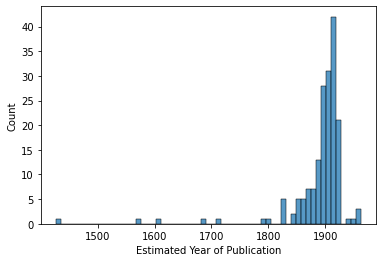

In [62]:
sns.histplot(data_df['Estimated Year of Publication'])

Most of the data seems to be skewed towards the 1900's

I did my best to get good data off of project Gutenberg, but the distribution of dates was not great as shown here

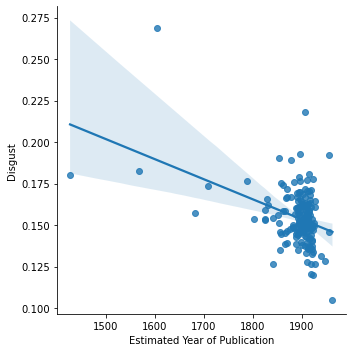

In [63]:
sns.lmplot(data=data_df, x='Estimated Year of Publication', y='Disgust')

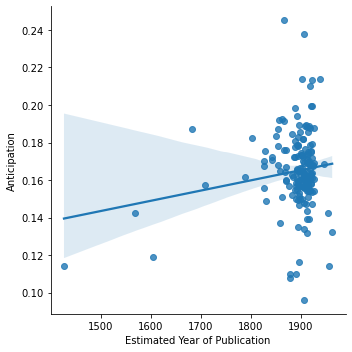

In [64]:
sns.lmplot(data=data_df, x='Estimated Year of Publication', y='Anticipation')

From the two graphs, I note that the trendline may be very heavily influenced by the few data points that are from before 1800

I need to figure out the impact of this and address it in my study

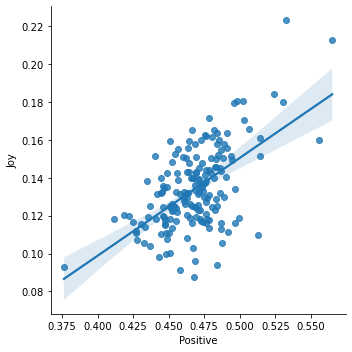

In [94]:
sns.lmplot(data=data_df, x='Positive', y='Joy')

As expected this is a quite strong interaction. It may be possible to reduce reduce the dimensionality by leveraging these similarities

I am in the process of learning PCA. I read the sklearn page and here is what I put together

<AxesSubplot:xlabel='# Dimensions Retained', ylabel='Portion of Variance Retained'>

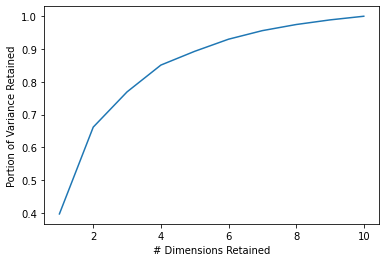

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
features = ['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Negative', 'Positive', 'Sadness', 'Surprise', 'Trust']
x = data_df_unclean.loc[:, features].values
pca = PCA(n_components=10)
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
axes_var = pca.explained_variance_ratio_ #the percent of variance that is preserved by each
v1 = axes_var[0]
v2 = v1 + axes_var[1]
v3 = v2 + axes_var[2]
v4 = v3 + axes_var[3]
v5 = v4 + axes_var[4]
v6 = v5 + axes_var[5]
v7 = v6 + axes_var[6]
v8 = v7 + axes_var[7]
v9 = v8 + axes_var[8]
v10 = v9 + axes_var[9]
variance_represented = [v1, v2, v3, v4, v5, v6, v7, v8, v9, v10]
dimensions_included = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
disp_dim_df = pd.DataFrame({'# Dimensions Retained':dimensions_included,'Portion of Variance Retained':variance_represented})
sns.lineplot(data=disp_dim_df, x='# Dimensions Retained', y='Portion of Variance Retained')

In [126]:
#The plot shows variance retained vs number of principal components (dimensions) used

disp_dim_df.style.hide_index()
#Here is the data in the graph above displayed in table form

# Dimensions Retained,Portion of Variance Retained
1,0.397373
2,0.661983
3,0.769414
4,0.851131
5,0.893081
6,0.929986
7,0.956118
8,0.974738
9,0.988869
10,1.000000


If we keep 4 dimensions, we can keep about 85% of the variance.

If we keep 5 dimensions, we can keep almost 90% of the variance.

Keeping 80-90% of the variance is a decent benchmark that prevents overfitting, improves visualizations, and allows for strong conclusions to still be drawn. The number of principal components (dimensions) used can change throughout the analysis, but starting it using the 4 most different ones and changing the number of dimensions to match the specificity needed for each analysis may be the best approach